In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy import optimize
import pyswarm
import time
import os

In [2]:
from skopt.space import Space
from skopt import space
from skopt.sampler import Sobol
from skopt.sampler import Lhs
from skopt.sampler import Halton
from skopt.sampler import Hammersly
from skopt.sampler import Grid
from scipy.spatial.distance import pdist

In [3]:
os.getcwd()

'C:\\Users\\KNITISH'

## Create a non convex objective function with non linear constraints

### Mishra Bird Function
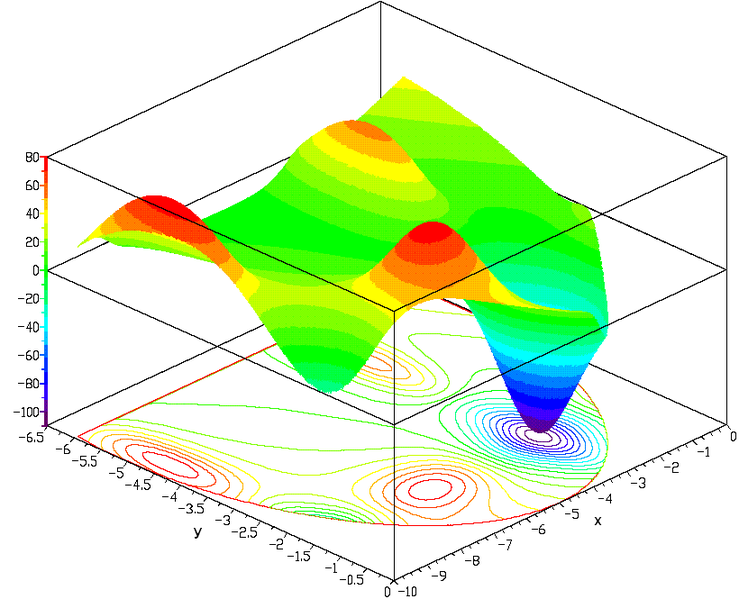

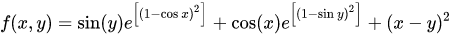
subjected to: 

Bounds:



Optimum Value:


### Plot the Objective Function in 3d and/or contourmap

In [4]:
def bird_obj(x):
    y=x[1]
    x=x[0]
    
    # Calculate the objective function value
    first_term = np.sin(y)*np.exp(np.square(1 - np.cos(x)))
    second_term = np.cos(x)*np.exp(np.square(1 - np.sin(y)))
    third_term = np.square(x - y)
    
    objective_value = first_term + second_term + third_term
    
    return objective_value


x = np.linspace(-10, 0, 500)
y = np.linspace(-6.5, 0, 500)

X, Y = np.meshgrid(x, y)


# Obtain cost fn values
final_sol = []
for xrow, yrow in zip(X, Y):
    row_val = []
    for x1, y1 in zip(xrow, yrow):
        row_val.append(bird_obj([x1, y1]))
    final_sol.append(row_val)
    



Text(0, 0.5, 'x2')

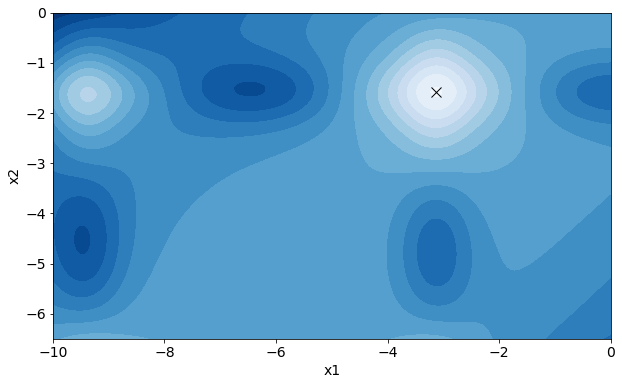

In [5]:
# Make Contour Plot
plt.figure(figsize = (10, 6))
plt.contourf(X, Y, np.array(final_sol), cmap = 'Blues', levels = 16)
plt.plot([-3.1302], [-1.5821], marker = 'x', markersize = 10, color = 'k')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);
plt.xlabel('x1', fontsize = 14)
plt.ylabel('x2', fontsize =  14)

In [6]:
def bird_obj(x):
    
    # Constraint Penalty
    penalty = + constraint_bird(x)
    
    y=x[1]
    x=x[0]
    
    # Calculate the objective function value
    first_term = np.sin(y)*np.exp(np.square(1 - np.cos(x)))
    second_term = np.cos(x)*np.exp(np.square(1 - np.sin(y)))
    third_term = np.square(x - y)
    
    objective_value = first_term + second_term + third_term
    
    return objective_value + penalty

def constraint_bird(x):
    y = x[1]
    x = x[0]
    
    
    if np.square(x+5)+np.square(y+5) >= 25:
        penalty = 100
    else:
        penalty = 0
        
    return penalty


lb = [-10, -6.5]
ub = [0, 0]
bounds = list(zip(lb, ub))
x0 = [-3,-1]



######## Use L-BFGS-B ########

'''results = optimize.minimize(fun=bird_obj, x0=x0, method = 'L-BFGS-B', bounds = list(zip(lb, ub)), 
               options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 
                        'gtol': 1e-07, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 45})'''
n_init = 100
x_results = []
y_results = []
init = np.random.uniform(low = lb, high = ub, size = (n_init, 2))

for initial in init:
    results = optimize.minimize(fun=bird_obj, x0=initial, method = 'L-BFGS-B', bounds = list(zip(lb, ub)), 
                   options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 
                            'gtol': 1e-07, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 200})
    x_results.append(results.x)
    y_results.append(results.fun)

In [286]:
x_results, y_results

([array([-3.27212832, -6.5       ]),
  array([-3.27212832, -6.5       ]),
  array([-9.31214226, -6.5       ]),
  array([-3.27212834, -6.5       ]),
  array([-3.13024691, -1.58214205]),
  array([-3.13024705, -1.582142  ]),
  array([-5.37766664, -5.6179077 ]),
  array([-3.13024674, -1.58214229]),
  array([-5.37766662, -5.61790769]),
  array([-5.37766661, -5.61790779]),
  array([-3.13024674, -1.58214216]),
  array([-5.37766692, -5.6179081 ]),
  array([-8.80872728, -1.76068827]),
  array([-3.13024682, -1.58214219]),
  array([-3.27212833, -6.5       ]),
  array([-3.13024682, -1.58214219]),
  array([-8.87327532, -1.83829319]),
  array([-5.37766663, -5.61790767]),
  array([-9.09096157, -2.1255687 ]),
  array([-3.13024678, -1.58214216]),
  array([-5.3776665 , -5.61790761]),
  array([-3.27212834, -6.5       ]),
  array([-3.1302468, -1.5821422]),
  array([-3.1302467 , -1.58214224]),
  array([-3.13024673, -1.58214194]),
  array([-9.31214227, -6.5       ]),
  array([-3.13024724, -1.58214192]),
  a

In [288]:
print(f'Best X: {np.array(x_results)[np.argsort(y_results),:][0]}, Function Value: {y_results[np.argsort(y_results)[0]]}')

Best X: [-3.13024682 -1.58214218], Function Value: -106.7645367492647


### Using Basic Particle Swarm Optimization

In [289]:
def bird_obj(x):
    y=x[1]
    x=x[0]
    
    # Calculate the objective function value
    first_term = np.sin(y)*np.exp(np.square(1 - np.cos(x)))
    second_term = np.cos(x)*np.exp(np.square(1 - np.sin(y)))
    third_term = np.square(x - y)
    
    objective_value = first_term + second_term + third_term
    
    return objective_value

def constraint_bird(x):
    y = x[1]
    x = x[0]
    
    penalty = np.square(x+5)+np.square(y+5)-25
    return [-penalty]

optimizer = pyswarm.pso(func = bird_obj, lb = lb, ub = ub, ieqcons=[],
    f_ieqcons=constraint_bird,swarmsize=100,
    omega=0.5,
    phip=0.3,
    phig=0.9,
    maxiter=100,
    minstep=1e-08,
    minfunc=1e-08,
    debug=True)

Single constraint function given in f_ieqcons
New best for swarm at iteration 1: [-3.1690803  -1.78554757] -101.16187996703574
Best after iteration 1: [-3.1690803  -1.78554757] -101.16187996703574
New best for swarm at iteration 2: [-3.26101487 -1.57454655] -104.43052800226056
Best after iteration 2: [-3.26101487 -1.57454655] -104.43052800226056
Best after iteration 3: [-3.26101487 -1.57454655] -104.43052800226056
Best after iteration 4: [-3.26101487 -1.57454655] -104.43052800226056
New best for swarm at iteration 5: [-3.07902576 -1.67317617] -105.27596238812211
New best for swarm at iteration 5: [-3.12570242 -1.4984185 ] -105.80256270634146
Best after iteration 5: [-3.12570242 -1.4984185 ] -105.80256270634146
Best after iteration 6: [-3.12570242 -1.4984185 ] -105.80256270634146
New best for swarm at iteration 7: [-3.10118759 -1.59137155] -106.63659019086518
Best after iteration 7: [-3.10118759 -1.59137155] -106.63659019086518
New best for swarm at iteration 8: [-3.11459241 -1.58057078

THeoretical Minimum:
    

### Townsend Test Function: 
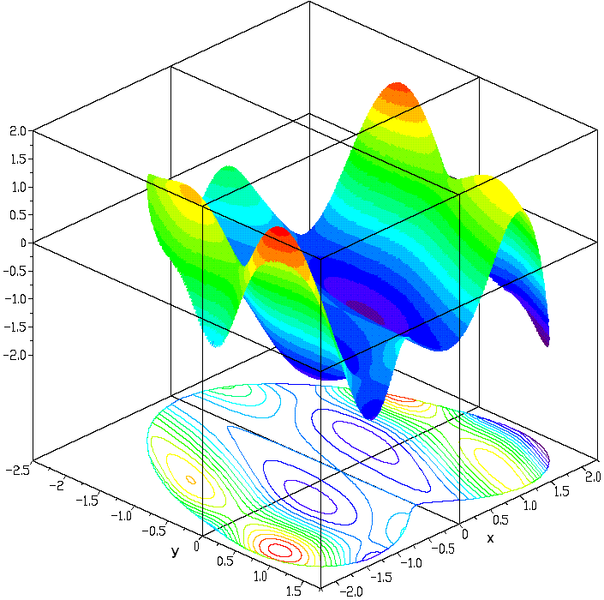



**Subject to** 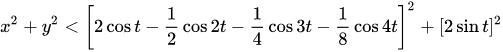
        where: t = Atan2(x,y)

**Bounds:**



**Optimum:**


Primary Formulation

In [7]:
def townsend(x):
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func

# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    return [-violation]
    
lb = [-2.25, -2.5]
ub = [2.5, 1.75]

### 3D Plot

<AxesSubplot:xlabel='x', ylabel='y'>

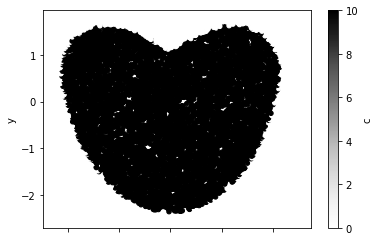

In [8]:
x = np.random.uniform(lb[0], ub[0], 10000)
y = np.linspace(lb[1], ub[1], 10000)

df = pd.DataFrame()
df['x']=x
df['y']=y
for ind, row in df.iterrows():
    xtemp = row['x']
    ytemp = row['y']
    df.loc[ind, 'c'] = constraint_townsend([xtemp, ytemp])
df.loc[df['c'] > 0, 'c'] = 10
df.loc[df['c'] <= 0, 'c'] = 0
df.plot.scatter('x', 'y', c='c')

Alternate Formulation

In [9]:
########## Alternate Formulation
def townsend(x):
    penalty = constraint_townsend(x)
    
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func + penalty

# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation = 10
    else:
        violation = 0
    
    return violation
    
lb = [-2.25, -2.5]
ub = [2.5, 1.75]

### Visualize Test Function

### Constrained Case

In [10]:
x = np.linspace(-2.25,  2.5, 500)
y = np.linspace(-2.5, 1.75, 500)

X, Y = np.meshgrid(x, y)

########## Alternate Formulation
def townsend(x):
    penalty = constraint_townsend(x)
    
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func + penalty

# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation = 10
    else:
        violation = 0
    
    return violation

# Obtain cost fn values
final_sol = []
constr_viol = []
for xrow, yrow in zip(X, Y):
    row_val = []
    row_cons = []
    for x1, y1 in zip(xrow, yrow):
        row_val.append(townsend([x1, y1]))
        row_cons.append(townsend([x1, y1]))
    final_sol.append(row_val)
    constr_viol.append(row_cons)

In [11]:
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    return violation
constraint_townsend([1.5, 1.5])

-0.44462256441743353

In [12]:
np.arctan2(1,2)

0.4636476090008061

In [13]:
plt.style.use('default')

Minima -2.0239883469233906
Constraint -0.002218601142379484


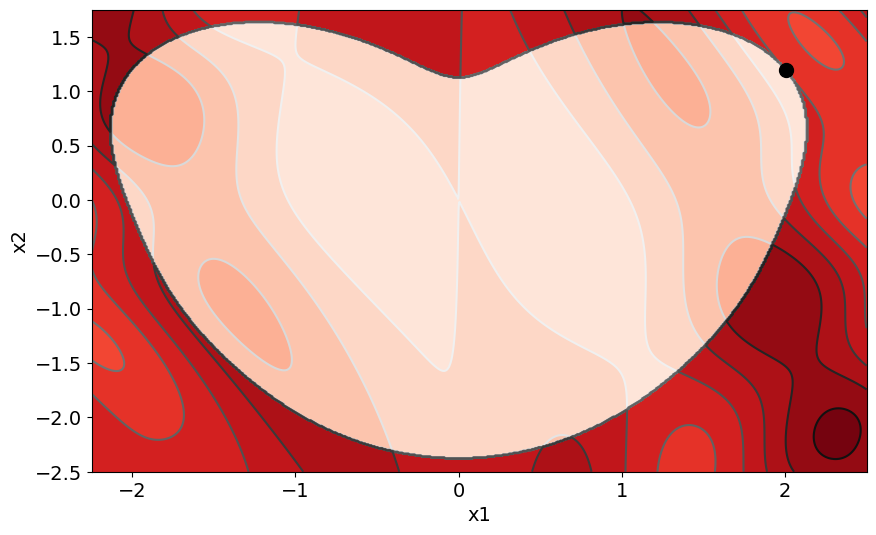

In [14]:
# Make Contour Plot
plt.figure(figsize = (10, 6))
plt.contourf(X, Y, np.array(final_sol), cmap = 'Blues', levels = 16)
plt.contour(X, Y, np.array(final_sol), cmap = 'Greys', levels = 16)
plt.contourf(X, Y, np.array(constr_viol), cmap = 'Reds', levels = 16)

#plt.plot([2.005], [1.194], marker = 'o', markersize = 30, color = 'white', alpha = .4, markeredgecolor = 'k')
plt.plot([2.005], [1.194], marker = 'o', markersize = 10, color = 'k')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);
plt.xlabel('x1', fontsize = 14)
plt.ylabel('x2', fontsize =  14)

print('Minima', townsend([2.0052938, 1.1944509]))
print('Constraint', constraint_townsend([2.005, 1.194]))

### Unconstrained case

In [152]:
x = np.linspace(-2.25,  2.5, 500)
y = np.linspace(-2.5, 1.75, 500)

X, Y = np.meshgrid(x, y)

def townsend(x):
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func

# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    return [-violation]

# Obtain cost fn values
final_sol = []
constr_viol = []
for xrow, yrow in zip(X, Y):
    row_val = []
    row_cons = []
    for x1, y1 in zip(xrow, yrow):
        row_val.append(townsend([x1, y1]))
        row_cons.append(townsend([x1, y1]))
    final_sol.append(row_val)
    constr_viol.append(row_cons)

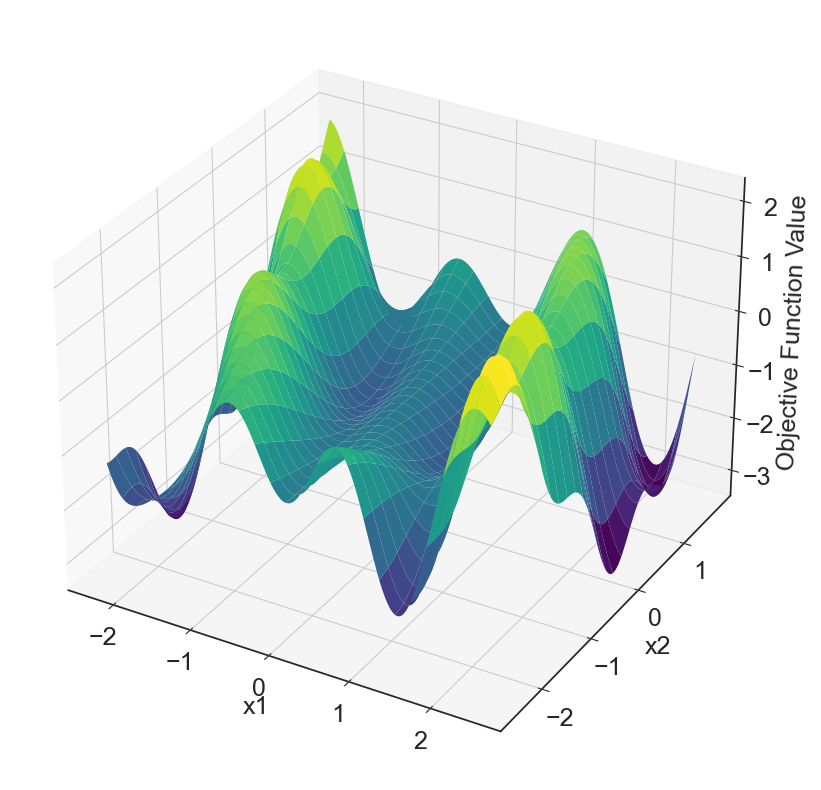

In [153]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, final_sol, 100, cmap='Blues')
ax.plot_surface(X, Y, np.array(final_sol), rstride=20, cstride=20,
                cmap='viridis', edgecolor='none')
#ax.set_title('Townsend Function');
ax.set_xlabel('x1', fontsize = 18)
ax.set_ylabel('x2', fontsize = 18)
plt.setp(ax.get_xticklabels()+ax.get_yticklabels()+ax.get_zticklabels(), fontsize = 18)
ax.set_zlabel('Objective Function Value', fontsize = 18);


Minima -2.0239883049799365
Constraint [0.002218601142379484]


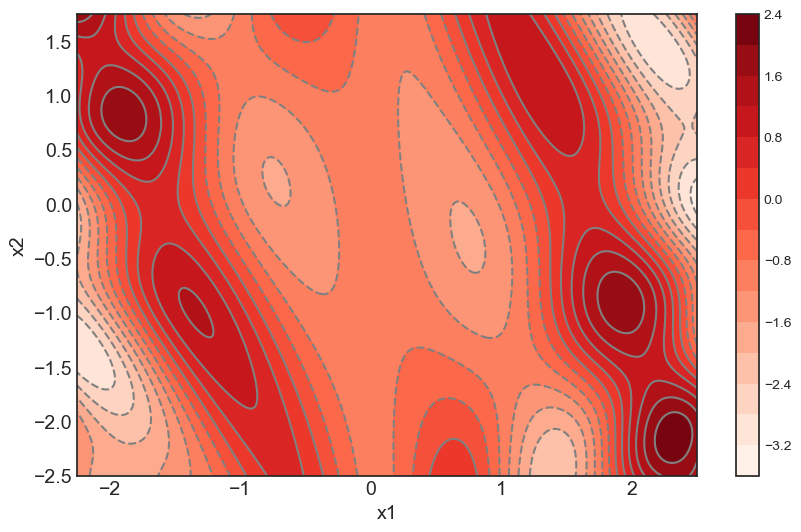

In [155]:
# Make Contour Plot
plt.figure(figsize = (10, 6))
plt.contourf(X, Y, np.array(final_sol), cmap = 'Reds', levels = 15)
plt.colorbar()
plt.contour(X, Y, np.array(final_sol), colors = 'grey', levels = 15)

#plt.contourf(X, Y, np.array(constr_viol), cmap = 'Reds', levels = 16)

#plt.plot([2.005], [1.194], marker = 'o', markersize = 30, color = 'white', alpha = .4, markeredgecolor = 'k')
#plt.plot([2.005], [1.194], marker = 'o', markersize = 10, color = 'k')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);
plt.xlabel('x1', fontsize = 14)
plt.ylabel('x2', fontsize =  14)

print('Minima', townsend([2.0052938, 1.1944509]))
print('Constraint', constraint_townsend([2.005, 1.194]))

In [15]:
# Only Mutation:
'''1. Mutation
2. Crossover
3. Dupes forbidden in r3, r1, r2,
4. The crossover when jrand = j is implemented; This extra condition prevents 
    us from ending up duplicating the base vector after crossover'''
# Multiprocessing map function
from joblib import Parallel, delayed

# Multiprocessing map function
def multimap(func, array, cores):
    '''import multiprocessing
    mp_pool = multiprocessing.Pool(cores)
    fx = np.array(mp_pool.map(func, array))'''
    fx = Parallel(n_jobs = cores)(delayed(func)(x) for x in array)
    
    return fx

def fix_bounds(population, lb, ub):
    npop = population.shape[0]
    inits_random_replace = random_initialize_uniform(lb, ub, npop)
    lb = np.array(lb).reshape(1, -1)
    ub = np.array(ub).reshape(1, -1)
    
    population = np.array(population)
    mask = (population<lb) | (population>ub)
    population[mask] = inits_random_replace[mask]
    
    return population

def fix_strategy(param, lb, ub, method = 'random'):
    
    if method == 'random':
        rands = np.random.uniform(lb, ub, param.shape[0])
        param[param<lb] = rands[param<lb]
        param[param>ub] = rands[param>ub]
        
    if method == 'clip': 
        param = np.clip(param, lb, ub)
        
    '''if method == 'average':
        rands = np.random.uniform(lb, ub, param.shape[0])
        param[param<lb] = np.mean(rands[param<lb].reshape(-1, 1), np.array([lb]*sum(param<lb)).reshape()
        param[param>ub] = rands[param>ub] '''       
    return param

# Elementary differential Evolution Mutation Operator
def sade_mutation(pop, f, tau = None, flims = (.1, 1.1)):
    '''duplicates are allowed in r1, r2, r3;
    Introducing duplicates can result in no mutation - hence, it results only in uniform crossover'''
    if tau is None:
        tau = 1/(np.sqrt(2*len(pop[0])))
        
    pop = np.array(pop)
    mutated_pop = []
    n_samples = pop.shape[0]
    ncols = pop.shape[1]
    
    # Create Indices for Principal, base and the difference vectors
    x_indices = np.arange(pop.shape[0])
    principal = pop[x_indices]
    
    # Sample the relevant vectors
    base_indices = np.array([np.random.choice([val for val in x_indices if val != i], 1)[0] for i in x_indices])
    diff1_indices = np.array([np.random.choice([val for val in x_indices if val not in (i, base_indices[i])], 1)[0] for i in x_indices])
    diff2_indices = np.array([np.random.choice([val for val in x_indices if val not in (i, base_indices[i], diff1_indices[i])], 1)[0] for i in x_indices])
    
    base = pop[base_indices]
    diff1 = pop[diff1_indices]
    diff2 = pop[diff2_indices]
    
    # calculate f_averaged
    indices_second = np.array([x_indices, base_indices, diff1_indices, diff2_indices])
    fs = f[indices_second].mean(axis = 0)
    fs = fs.reshape(-1, 1)
    #print(fs)
    
    # Update Mutation constant
    random_numbers = np.random.normal(0, 1, (n_samples, 1))
    fs = fs * np.exp(tau*random_numbers)
    
    # Clip the Random Numbers
    fs = fix_strategy(fs.flatten(), lb=flims[0], ub=flims[1]).reshape(-1, 1)
    #fs = np.clip(fs, flims[0], flims[1])
    #print(fs)
    return indices_second, fs, base + fs*(diff1 - diff2)


def de_crossover(pop, mutated, cr, indices, tau, clims = None):
    #print(pop[0], mutated[0])
    #print(pop.shape, mutated.shape)
    
    n_samples = pop.shape[0]
    cols  =  pop.shape[1]
    if clims is None:
        clims = (1/cols, 1)
        
    if tau is None:
        tau = 1/(np.sqrt(1.414*len(pop[0])))
    randints=np.random.randint(0, pop.shape[1]+1, pop.shape[0])
    
    # Update CR
    cr = cr[indices].mean(axis = 0).flatten()
    
    random_numbers = np.random.normal(0, 1, n_samples).flatten()
    cr = cr * np.exp(tau*random_numbers)
    cr = fix_strategy(param=cr.flatten(), lb=clims[0], ub=clims[1])
    #cr = np.clip(cr, 0, 1)
    #print(cr)
    #print('here')
    crossed = [[mutant[i] if ((np.random.uniform(0,1) < cr[i]) or (randints[j]==i)) else parent[i] for i in range(len(mutated[0]))] for (mutant,
                                                                            parent, j) in zip(mutated, pop, range(len(pop))) ]
    return cr, crossed

# Elementary Differential Evolution selection Operator
def de_selection(pop1, pop2, obj, cores = 4):
    pop1 = np.array(pop1)
    pop2 = np.array(pop2)
    
    #objs_1 = np.apply_along_axis(func1d = obj, axis = 1, arr = pop1, )
    #objs_2 = np.apply_along_axis(func1d = obj, axis = 1, arr = pop2, )
    objs_1 = multimap(func = obj, array = pop1, cores = cores)
    objs_2 = multimap(func = obj, array = pop2, cores = cores)
    
    # Can be parallelized
    selected_population = np.array([pop2[i] if objs_2[i] < objs_1[i] else pop1[i] for i in range(len(objs_1))])
    selected_objectives = np.array([objs_2[i] if objs_2[i] < objs_1[i] else objs_1[i] for i in range(len(objs_1))])
    return selected_population, selected_objectives



def random_initialize_uniform(lb, ub, npop):
    return np.random.uniform(lb, ub, size = (npop, len(ub)))

'''def fix_bounds(population, lb, ub):
    population = np.array(population)
    return np.clip(population, lb, ub)'''



def sadiff_evolution(obj, lb, ub, f = .1, cr=.1, tau = None, flims = (.1, 1), npop = 25, max_iter=100, gtol = 10, ftol = 1e-3, 
                  init = None, verbose = True, cores = 4):
    # Initialize population within bounds
    if init is None:
        population = random_initialize_uniform(lb = lb, ub = ub, npop = npop)
    if type(f) == type(.3):
        f = np.array([f]*npop)
        
    if type(cr) == type(.3):
        cr = np.array([cr]*npop)
        
    print('cr', cr)
    #print(f)
    
    fs = []
    crs = []
    crs.append(cr)
    fs.append(f.reshape(-1, 1))
    obj_history = np.zeros(max_iter)
    for gen in range(max_iter):
        indices_to_average, f, mutated_population = sade_mutation(pop = population, f = f, tau = tau,
                                                                  flims = flims)
        
        mutated_population = fix_bounds(mutated_population, lb=lb, ub=ub)
        cr, crossed_population = de_crossover(pop = population, mutated = mutated_population, 
                                          cr = cr, indices = indices_to_average, tau = tau)
        population, obj_evals = de_selection(pop1=population, pop2=crossed_population, obj=obj, cores = cores)
        #obj_history.append(min(obj_evals))
        #if verbose: print(obj_history[-1])
        # Convergence Criterion - gtol, ftol
        '''if gen > gtol:
            if np.abs(obj_history[-1] - obj_history[-gtol-1]) < ftol:
                if verbose: print(f'Converged in Generation {gen}: Objective Changed less than {ftol} in the last {gtol} generations')
                break'''
        obj_history[gen] = min(obj_evals)
        if verbose: print(obj_history[gen])
        if gen > gtol:
            if np.abs(obj_history[gen] - obj_history[-gtol+gen]) < ftol:
                if verbose: print(f'Converged in Generation {gen}: Objective Changed less than {ftol} in the last {gtol} generations')
                break
        
        fs.append(f)
        crs.append(cr)
    #sorted_indices = sorted(np.arange(len(population)), key = lambda x: obj_evals[x])
    #best_x = population[sorted_indices[0], :]
    #best_y = obj_evals[sorted_indices[0]]
    best_index = np.argmin(obj_evals)
    best_x = population[best_index]
    best_y = obj_evals[best_index]
    return fs, crs, best_x, best_y
                             
def obj(x):
    return x[0]**4 + x[1]**2
def obj(x):
    X = x[0]
    Y = x[1]
    return (((X-36)**2)+((Y-30)**2))
'''pop1 = [[1,1],[2,2],[3,3],[4,4]]
pop2 = [[0,1],[3,4],[3,2],[3,9]]
elementary_de_selection(pop1, pop2, obj )'''



'pop1 = [[1,1],[2,2],[3,3],[4,4]]\npop2 = [[0,1],[3,4],[3,2],[3,9]]\nelementary_de_selection(pop1, pop2, obj )'

In [16]:
init_1 = time.time()
results  =  sadiff_evolution(obj=townsend, lb=lb, ub=ub, f = .1, tau=.12,
                            cr=.1, npop = 100, max_iter=300, gtol = 80, ftol = 1e-3, 
                  init = None, verbose = True, cores = 1)
print(time.time() - init_1)

cr [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
-6.559617570994773
-6.559617570994773
-6.559617570994773
-6.559617570994773
-6.559617570994773
-6.559617570994773
-6.559617570994773
-6.559617570994773
-6.608645257544644
-6.608645257544644
-6.608645257544644
-6.608645257544644
-6.608645257544644
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.6213175472107135
-6.621449297382897
-6.623457258006719
-6.623457258006719
-6.623457258006719
-6.623457258006719
-6.623457258006719
-6.623457258006719
-6.6234572

In [17]:
results

([array([[0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
         [0.1],
        

Primary PSO

In [248]:
optimizer = pyswarm.pso(func = townsend, lb = lb, ub = ub, ieqcons=[],
    f_ieqcons=constraint_townsend,swarmsize=10000,
    omega=0.5,
    phip=0.5,
    phig=0.5,
    maxiter=100,
    minstep=1e-08,
    minfunc=1e-08,
    debug=True)

Single constraint function given in f_ieqcons
New best for swarm at iteration 1: [ 0.75166921 -0.31209482] -1.6594276256351668
Best after iteration 1: [ 0.75166921 -0.31209482] -1.6594276256351668
New best for swarm at iteration 2: [ 0.75199451 -0.32873687] -1.65948501740336
Best after iteration 2: [ 0.75199451 -0.32873687] -1.65948501740336
Best after iteration 3: [ 0.75199451 -0.32873687] -1.65948501740336
Best after iteration 4: [ 0.75199451 -0.32873687] -1.65948501740336
Best after iteration 5: [ 0.75199451 -0.32873687] -1.65948501740336
New best for swarm at iteration 6: [ 0.75161108 -0.32721483] -1.6594916395469532
New best for swarm at iteration 6: [ 0.75380623 -0.3225473 ] -1.6595011019503803
Best after iteration 6: [ 0.75380623 -0.3225473 ] -1.6595011019503803
Best after iteration 7: [ 0.75380623 -0.3225473 ] -1.6595011019503803
New best for swarm at iteration 8: [ 0.75197561 -0.32409093] -1.6595089125880764
Best after iteration 8: [ 0.75197561 -0.32409093] -1.6595089125880764

Alternate PSO

In [432]:
optimizer = pyswarm.pso(func = townsend, lb = lb, ub = ub, ieqcons=[],
    swarmsize=1000,
    omega=0.7,
    phip=0.9,
    phig=0.2,
    maxiter=100,
    minstep=1e-11,
    minfunc=1e-11,
    debug=True)

No constraints given.
Best after iteration 1: [2.02184187 1.12629299] -1.9075744173641103
Best after iteration 2: [2.02184187 1.12629299] -1.9075744173641103
New best for swarm at iteration 3: [1.96411846 1.24330242] -1.9403109004063972
Best after iteration 3: [1.96411846 1.24330242] -1.9403109004063972
New best for swarm at iteration 4: [1.9673784  1.25886795] -1.957001937269983
Best after iteration 4: [1.9673784  1.25886795] -1.957001937269983
Best after iteration 5: [1.9673784  1.25886795] -1.957001937269983
New best for swarm at iteration 6: [1.95575143 1.26837343] -1.9700572675472399
Best after iteration 6: [1.95575143 1.26837343] -1.9700572675472399
New best for swarm at iteration 7: [1.99419833 1.21378319] -2.021402129020499
Best after iteration 7: [1.99419833 1.21378319] -2.021402129020499
Best after iteration 8: [1.99419833 1.21378319] -2.021402129020499
Best after iteration 9: [1.99419833 1.21378319] -2.021402129020499
Best after iteration 10: [1.99419833 1.21378319] -2.02140

### LBFGS

In [282]:
bounds = list(zip(lb, ub))
x0 = [1,.5]



######## Use L-BFGS-B ########
n_init = 1000
x_results = []
y_results = []
cv_lbfgs = []
#init = np.random.uniform(low = lb, high = ub, size = (n_init, 2))

########## Alternate Formulation
# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation = np.log(1+violation)+violation
    else:
        violation= 0
    return violation
def townsend(x):   
    violation =constraint_townsend(x)
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func+violation
def document_constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation =np.abs(violation)
    else:
        violation= 0
    return violation

init_time = time.time()

for initial in init:
    results = optimize.minimize(fun=townsend, x0=initial, method = 'L-BFGS-B', bounds = list(zip(lb, ub)), 
                   options={'disp': None, 'maxcor': 2, 'ftol': 2.220446049250313e-19, 
                            'gtol': 1e-19, 'eps': 1e-18, 'maxfun': 15000, 'maxiter': 2000})
    x_results.append(results.x)
    y_results.append(results.fun)
    cv_lbfgs.append(document_constraint_townsend(results.x))
    
y_best_lbfgs = townsend(np.array(x_results)[np.argmin(y_results)])
cons_best_lbfgs = document_constraint_townsend(np.array(x_results)[np.argmin(y_results)])

final_time = time.time()
lbfgs_time = final_time - init_time
print(f'Time taken for 1000 Fresh Runs: {lbfgs_time}')    


Time taken for 1000 Fresh Runs: 7.556810617446899


In [283]:
cons_best_lbfgs

0

In [284]:
results

      fun: -1.6396953074416936
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.,  0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 12
     njev: 16
   status: 0
  success: True
        x: array([-0.72718819,  0.21105331])

In [285]:
ppt_data = pd.DataFrame()
ppt_data['X1'] = np.array(x_results)[:, 0].round(6)
ppt_data['X2'] = np.array(x_results)[:, 1].round(6)

ppt_data['Yopt'] = y_results
ppt_data['Violation'] = cv_lbfgs

ppt_data = ppt_data.sort_values('Yopt', ascending = True)
ppt_data

,X1,X2,Yopt,Violation
851,2.005132,1.194744,-2.023988,0.0
75,2.005475,1.194122,-2.023988,0.0
655,2.004919,1.195130,-2.023986,0.0
82,2.004882,1.195196,-2.023986,0.0
180,2.004625,1.195660,-2.023981,0.0
...,...,...,...,...
940,-1.556370,-1.260756,0.293803,0.0
113,-1.510130,-1.335209,0.312969,0.0
775,-1.469896,-1.396793,0.334949,0.0
146,-1.405085,-1.490507,0.378889,0.0


#### Newton's Trust-Constr Method

In [23]:
########## Alternate Formulation
# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation =np.log(1 + violation)
    else:
        violation= 0
    return violation
def townsend(x):   
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func
def document_constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation =np.abs(violation)
    else:
        violation= 0
    return violation

In [24]:
# Scipy nonlinear constraint
constr = optimize.NonlinearConstraint(constraint_townsend, -np.inf, 0)
constraints = [constr, {'type': 'ineq', 'fun': constraint_townsend}]

In [25]:
n_init = 1000
x_results = []
y_results = []
cv_trust = []
init = np.random.uniform(low = lb, high = ub, size = (n_init, 2))


init_time = time.time()
for initial in init:
    results = optimize.minimize(fun=townsend, x0=initial, method = 'trust-constr', bounds = list(zip(lb, ub)), 
                   options={'disp': None,  
                             'maxiter': 2000}, constraints = constraints)
    x_results.append(results.x)
    y_results.append(results.fun)
    cv_trust.append(document_constraint_townsend(results.x))
    
y_best_trust = townsend(np.array(x_results)[np.argmin(y_results)])
cons_best_trust = document_constraint_townsend(np.array(x_results)[np.argmin(y_results)])

final_time = time.time()
trust_time = final_time - init_time
print(f'Time taken for 1000 Fresh Runs: {trust_time}')

C:\Users\KNITISH\Miniconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\KNITISH\Miniconda3\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


Time taken for 1000 Fresh Runs: 640.9146251678467


In [26]:
ppt_data = pd.DataFrame()
ppt_data['X1'] = np.array(x_results)[:, 0].round(6)
ppt_data['X2'] = np.array(x_results)[:, 1].round(6)

ppt_data['Yopt'] = y_results
ppt_data['Violation'] = cv_trust

ppt_data = ppt_data.sort_values('Yopt', ascending = True)
ppt_data

,X1,X2,Yopt,Violation
549,2.005293,1.194453,-2.023988,0.0
457,2.005293,1.194453,-2.023988,0.0
267,2.005288,1.194461,-2.023988,0.0
37,2.005351,1.194347,-2.023988,0.0
387,2.005223,1.194579,-2.023988,0.0
...,...,...,...,...
314,-1.314147,-1.611893,0.451677,0.0
280,-1.292640,-1.639007,0.469756,0.0
27,-1.655692,-0.965248,0.553802,0.0
147,-1.679459,-0.831039,0.666810,0.0


## SLSQP

In [238]:
########## Alternate Formulation
# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        #violation =np.log(1 + violation)
        violation = np.abs(violation)
    else:
        violation= 0
    return violation
def townsend(x):   
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func
def document_constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation =np.abs(violation)
    else:
        violation= 0
    return violation

In [239]:
# Scipy nonlinear constraint
constr = optimize.NonlinearConstraint(constraint_townsend, -np.inf, 0)
constraints = [constr, {'type': 'ineq', 'fun': constraint_townsend}]

In [245]:
n_init = 1000
x_results = []
y_results = []
cv_slsqp = []
#init = np.random.uniform(low = lb, high = ub, size = (n_init, 2))


init_time = time.time()
for initial in init_uniform:
    results = optimize.minimize(fun=townsend, x0=initial, method = 'SLSQP', bounds = list(zip(lb, ub)), 
                   options= {'maxiter': 1000, 'ftol': 1e-28, 'iprint': 1,
                             'disp': False, 'eps': 1.4901161193847656e-18,
                             'finite_diff_rel_step': None}, constraints = constraints)
    x_results.append(results.x)
    y_results.append(results.fun)
    cv_slsqp.append(document_constraint_townsend(results.x))
final_time = time.time()
    
slsqp_time = final_time - init_time
print(f'Time taken for 1000 Fresh Runs: {slsqp_time}')

y_best_slsqp = townsend(np.array(x_results)[np.argmin(y_results)])
cv_best_slsqp = document_constraint_townsend(np.array(x_results)[np.argmin(y_results)])


Time taken for 1000 Fresh Runs: 12.47692584991455


In [246]:
actualx1opt = 2.0052938
actualx2opt = 1.1944509

In [247]:
ppt_data = pd.DataFrame()
ppt_data['X1'] = np.array(x_results)[:, 0]
ppt_data['X2'] = np.array(x_results)[:, 1]

ppt_data['Yopt'] = y_results
ppt_data['Violation'] = cv_slsqp

ppt_data = ppt_data.sort_values('Yopt', ascending = True)
ppt_data

,X1,X2,Yopt,Violation
249,2.005293,1.194453,-2.023989,1.272395e-07
369,2.005293,1.194453,-2.023989,1.061323e-07
792,2.005293,1.194453,-2.023988,3.499622e-09
28,2.005293,1.194453,-2.023988,1.407848e-09
442,2.005293,1.194453,-2.023988,2.144205e-10
...,...,...,...,...
377,-2.038037,0.012841,-0.630540,0.000000e+00
879,-2.038236,0.013645,-0.629989,0.000000e+00
875,2.034138,-0.002867,-0.628519,0.000000e+00
40,2.033559,-0.005184,-0.620454,8.881784e-16


<AxesSubplot:ylabel='Frequency'>

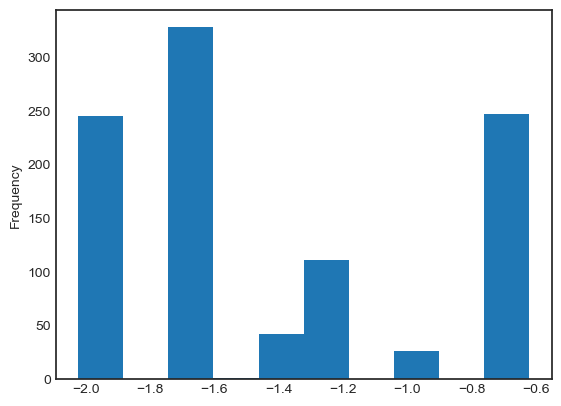

In [243]:
ppt_data['Yopt'].plot.hist()

### COBYLA

In [640]:
bounds

[(-2.25, 2.5), (-2.5, 1.75)]

In [290]:
########## Alternate Formulation
# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
        
        
    
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation = np.abs(violation)
    else:
        violation= 0
        
    
    if x < -2.25:
        violation += np.abs(-2.25 - x)
    if x > 2.5:
        violation += np.abs(2.5 - x)
        
    if y < -2.5:
        violation += np.abs(-2.5 - y)
    if y > 1.75:
        violation += np.abs(1.75 - y)      
    
    return violation*100

def document_constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation =np.abs(violation)
    else:
        violation= 0
    return violation



def townsend(x):   
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func


In [291]:
# Scipy nonlinear constraint
constr = optimize.NonlinearConstraint(constraint_townsend, -np.inf, 0)
constraints = [constr, {'type': 'ineq', 'fun': constraint_townsend}]

In [301]:
n_init = 1000
x_results = []
y_results = []
cv_cobyla = []
fun_evals = []

init_uniform = np.random.uniform(low = lb, high = ub, size = (n_init, 2))

init_time = time.time()
for initial in init:
    results = optimize.minimize(fun=townsend, x0=initial, method = 'COBYLA',options=
                   {'rhobeg': 1.0, 'maxiter': 1000, 'disp': False, 'catol': 0.000002}, constraints = constraints)
    x_results.append(results.x)
    y_results.append(townsend(results.x))
    cv_cobyla.append(document_constraint_townsend(results.x))
    fun_evals.append(results.nfev)
y_best_cobyla = townsend(np.array(x_results)[np.argmin(y_results)])
cv_best_cobyla = document_constraint_townsend(np.array(x_results)[np.argmin(y_results)])

    
final_time = time.time()
cobyla_time = final_time - init_time
print(f'Time taken for 1000 Fresh Runs: {cobyla_time}')

Time taken for 1000 Fresh Runs: 3.564635753631592


In [293]:
actualx1opt = 2.0052938
actualx2opt = 1.1944509

In [302]:
ppt_data = pd.DataFrame()
ppt_data['X1'] = np.array(x_results)[:, 0]
ppt_data['X2'] = np.array(x_results)[:, 1]

ppt_data['Yopt'] = y_results
ppt_data['Violation'] = cv_cobyla
ppt_data['Fun_Evals'] = fun_evals
ppt_data = ppt_data.sort_values('Yopt', ascending = True)
ppt_data

,X1,X2,Yopt,Violation,Fun_Evals
596,2.004650,1.195633,-2.024034,3.845004e-05,51
328,2.005294,1.194451,-2.023988,5.230987e-08,54
751,2.005295,1.194449,-2.023988,5.230983e-08,60
638,2.005291,1.194457,-2.023988,5.230417e-08,47
252,2.005295,1.194449,-2.023988,5.230980e-08,48
...,...,...,...,...,...
732,-2.020588,-0.056219,-0.653564,0.000000e+00,53
534,-2.020333,-0.057208,-0.653557,0.000000e+00,93
358,-2.020724,-0.055624,-0.653465,0.000000e+00,106
553,-2.021049,-0.054287,-0.653341,0.000000e+00,62


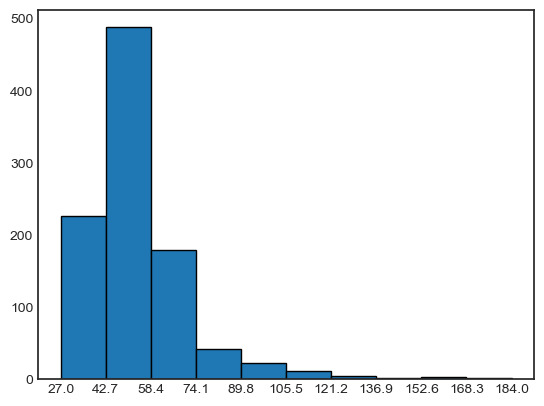

In [309]:
n, bins, patches = plt.hist(ppt_data['Fun_Evals'][ppt_data['Fun_Evals'] < 200], edgecolor = 'k')
plt.xticks(bins, np.around(bins, 1));

### Conjugate Gradient

In [286]:
def lhs_init(lb, ub, n):
        space = Space(list(zip(lb, ub)))
        lhs = Lhs(criterion="correlation", iterations=10000)
        gen = lhs.generate(space.dimensions, n)
        return np.array(gen)

init = lhs_init(lb, ub, 1000)
print('Initialization Done')

Initialization Done


In [287]:
########## Alternate Formulation
# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
        
        
    
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation = np.abs(violation) + np.log(1 + violation)
    else:
        violation= 0
        
    
    if x < -2.25:
        violation += np.abs(-2.25 - x)
    if x > 2.5:
        violation += np.abs(2.5 - x)
        
    if y < -2.5:
        violation += np.abs(-2.5 - y)
    if y > 1.75:
        violation += np.abs(1.75 - y)      
    
    return violation*100

def document_constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation =np.abs(violation)
    else:
        violation= 0
    return violation



def townsend(x): 
    penalty = constraint_townsend(x)
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func + penalty
# Scipy nonlinear constraint
constr = optimize.NonlinearConstraint(constraint_townsend, -np.inf, 0)
constraints = [constr, {'type': 'ineq', 'fun': constraint_townsend}]

In [288]:
n_init = 1000
x_results = []
y_results = []
cv_cg = []
init = np.random.uniform(low = lb, high = ub, size = (n_init, 2))


init_time = time.time()
for initial in init:
    results = optimize.minimize(fun = townsend, x0 = initial, args=(), method='CG', jac=None, tol=None, callback=None, 
                                options={'gtol': 1e-09, 'norm': np.inf, 'eps': 1.4901161193847656e-12, 'maxiter': None, 
                                         'disp': False, 'return_all': False, 'finite_diff_rel_step': None})
    x_results.append(results.x)
    y_results.append(townsend(results.x))
    cv_cg.append(document_constraint_townsend(results.x))
    
y_best_cg = townsend(np.array(x_results)[np.argmin(y_results)])
cv_best_cg = document_constraint_townsend(np.array(x_results)[np.argmin(y_results)])

    
final_time = time.time()
cg_time = final_time - init_time
print(f'Time taken for 1000 Fresh Runs: {cg_time}')

Time taken for 1000 Fresh Runs: 8.19391942024231


In [289]:
ppt_data = pd.DataFrame()
ppt_data['X1'] = np.array(x_results)[:, 0]
ppt_data['X2'] = np.array(x_results)[:, 1]

ppt_data['Yopt'] = y_results
ppt_data['Violation'] = cv_cg
ppt_data = ppt_data.sort_values('Yopt', ascending = True)
ppt_data

,X1,X2,Yopt,Violation
195,2.001856,1.200622,-2.023793,0.000000
413,2.027700,1.151114,-2.015096,0.000000
915,0.752526,-0.323520,-1.659511,0.000000
842,0.752525,-0.323519,-1.659511,0.000000
235,0.752526,-0.323519,-1.659511,0.000000
...,...,...,...,...
545,-1.905067,1.143339,1.449838,0.000000
972,-1.947015,1.004022,1.715014,0.000000
234,-1.946724,0.986757,1.739123,0.000000
879,-1.909046,0.939529,1.806622,0.000000


### Make Plots

In [12]:
import altair as alt


In [33]:
time_dict = {'COBYLA': 3.42, 'SLSQP': 13.55, 'LBFGSB': 4.95, 'SQP': 3.1}
order = ['COBYLA', 'SLSQP', 'LBFGSB', 'SQP']

#time_dict = {'COBYLA': cobyla_time, 'SLSQP': slsqp_time, 'LBFGSB': lbfgs_time}

source = pd.DataFrame(pd.Series(time_dict)).reset_index().round(2)
source.columns = ['Algorithm', 'Time(Secs)']
source.info()

bars = alt.Chart(source).mark_bar().encode(
    y=alt.Y('Algorithm:O', sort = order),
    x=alt.X("Time(Secs):Q", scale=alt.Scale(domain = (1, 20))),
    color=alt.condition(
        (alt.datum.Algorithm == 'SQP'),  # If the year is 1810 this test returns True,
        alt.value('tomato'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Time(Secs):Q'
)

(bars + text).properties(height=100, width = 400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Algorithm   4 non-null      object 
 1   Time(Secs)  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


alt.LayerChart(...)

In [35]:
sol_dict = {'COBYLA': -2.02444179094, 'SLSQP': -2.02398836557,  'LBFGSB': -2.02377596632, 'SQP':-2.023988388683700}
order = ['COBYLA', 'SLSQP', 'LBFGSB', 'SQP']

#time_dict = {'COBYLA': cobyla_time, 'SLSQP': slsqp_time, 'LBFGSB': lbfgs_time}

source = pd.DataFrame(pd.Series(sol_dict)).reset_index()
source.columns = ['Algorithm', 'Objective Function']
source.info()

bars = alt.Chart(source).mark_bar().encode(
    y=alt.Y('Algorithm:O', sort = order),
    x=alt.X("Objective Function:Q", scale=alt.Scale(domain = (-2.0246,-2.0235))),
    color=alt.condition(
        (alt.datum.Algorithm == 'SQP'),  # If the year is 1810 this test returns True,
        alt.value('tomato'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Objective Function:Q'
)

(bars + text).properties(height=100, width = 400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Algorithm           4 non-null      object 
 1   Objective Function  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


alt.LayerChart(...)

In [40]:
sol_dict = {'COBYLA': .000464039891702, 'SLSQP': 2.37274555559e-9, 'LBFGSB': 0, 'SQP': 0.000001928523385}
order = ['COBYLA', 'SLSQP', 'LBFGSB', 'SQP']

#time_dict = {'COBYLA': cobyla_time, 'SLSQP': slsqp_time, 'LBFGSB': lbfgs_time}

source = pd.DataFrame(pd.Series(sol_dict)).reset_index()
source.columns = ['Algorithm', 'Constraint Violation']
source.info()
import altair as alt
bars = alt.Chart(source).mark_bar().encode(
    y=alt.Y('Algorithm:O', sort = order),
    x=alt.X("Constraint Violation:Q", scale=alt.Scale(domain = (0,.00065))),
    color=alt.condition(
        (alt.datum.Algorithm == 'SQP'),  # If the year is 1810 this test returns True,
        alt.value('tomato'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Constraint Violation:Q'
)

(bars + text).properties(height=100, width = 400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Algorithm             4 non-null      object 
 1   Constraint Violation  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


alt.LayerChart(...)

### Document Time Taken

In [10]:
time_dict = {'COBYLA': cobyla_time, 'SLSQP': slsqp_time, 'LBFGSB': lbfgs_time,
             'Trust Region Constrained Algorithm': trust_time}

#time_dict = {'COBYLA': cobyla_time, 'SLSQP': slsqp_time, 'LBFGSB': lbfgs_time}

source = pd.DataFrame(pd.Series(time_dict)).reset_index().round(2)
source.columns = ['Algorithm', 'Time(Secs) in Log Scale']
source.info()



NameError: name 'cobyla_time' is not defined

In [43]:
import altair as alt
bars = alt.Chart(source).mark_bar().encode(
    y='Algorithm:O',
    x=alt.X("Time(Secs) in Log Scale:Q", scale=alt.Scale(type='log', domain = (1, 2000)))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Time(Secs) in Log Scale:Q'
)

(bars + text).properties(height=100, width = 400)

alt.LayerChart(...)

### Document Solution - Optimum

In [57]:
sol_dict = {'COBYLA': y_best_cobyla, 'SLSQP': y_best_slsqp, 'LBFGSB': y_best_lbfgs,
             'Trust Region Constrained Algorithm': y_best_trust}

#time_dict = {'COBYLA': cobyla_time, 'SLSQP': slsqp_time, 'LBFGSB': lbfgs_time}

source = pd.DataFrame(pd.Series(sol_dict)).reset_index()
source.columns = ['Algorithm', 'Objective Function']
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Algorithm           4 non-null      object 
 1   Objective Function  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [61]:
import altair as alt
bars = alt.Chart(source).mark_bar().encode(
    y='Algorithm:O',
    x=alt.X("Objective Function:Q", scale=alt.Scale(domain = (-2.0246,-2.0235)))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Objective Function:Q'
)

(bars + text).properties(height=100, width = 400)

alt.LayerChart(...)

### Constraint Violation

In [63]:
sol_dict = {'COBYLA': cv_best_cobyla, 'SLSQP': cv_best_slsqp, 'LBFGSB': cons_best_lbfgs,
             'Trust Region Constrained Algorithm': cons_best_trust}

#time_dict = {'COBYLA': cobyla_time, 'SLSQP': slsqp_time, 'LBFGSB': lbfgs_time}

source = pd.DataFrame(pd.Series(sol_dict)).reset_index()
source.columns = ['Algorithm', 'Constraint Violation']
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Algorithm             4 non-null      object 
 1   Constraint Violation  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [66]:
import altair as alt
bars = alt.Chart(source).mark_bar().encode(
    y='Algorithm:O',
    x=alt.X("Constraint Violation:Q", scale=alt.Scale(domain = (0,.00065)))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Constraint Violation:Q'
)

(bars + text).properties(height=100, width = 400)

alt.LayerChart(...)

### PSO

In [ ]:
print(time.time() - init_1)

In [89]:
########## Alternate Formulation
# Constraint function returns a positive number on being satisfied
def constraint_townsend(x):
    y = x[1]
    x = x[0]
    
    t = np.arctan2(x, y)
    #t = np.arctan(x/y)
    
    lhs = np.square(x) + np.square(y)
    rhs = np.square((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + np.square(2*np.sin(t))
    #rhs = ((2*np.cos(t)) -(.5*np.cos(2*t)) -(.25*np.cos(3*t)) -(.125*np.cos(4*t))) + 2*np.sin(t)
    violation  =  lhs-rhs
    
    if violation > 0:
        violation =np.log(1 + violation)
    else:
        violation= 0
    return -violation
def townsend(x):   
    y = x[1]
    x = x[0]
    
    first_term = -np.square(np.cos((x-.1)*y))
    second_term = -x*np.sin((3*x)+y)
    func = first_term+second_term
    return func


In [142]:
initt = time.time()
optimizer = pyswarm.pso(func = townsend, lb = lb, ub = ub, ieqcons=[],
    f_ieqcons=constraint_townsend,swarmsize=100,
    omega=0.75,
    phip=.7,
    phig=.7,
    maxiter=50,
    minstep=1e-12,
    minfunc=1e-12,
    debug=True)

print(time.time() - initt)

Single constraint function given in f_ieqcons
Best after iteration 1: [ 0.67194029 -0.2016599 ] -1.6388961836703784
Best after iteration 2: [ 0.67194029 -0.2016599 ] -1.6388961836703784
New best for swarm at iteration 3: [ 0.73832967 -0.21629548] -1.6528202115550577
Best after iteration 3: [ 0.73832967 -0.21629548] -1.6528202115550577
New best for swarm at iteration 4: [ 0.76133704 -0.35839241] -1.6587785056246473
New best for swarm at iteration 4: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 4: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 5: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 6: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 7: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 8: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 9: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 10: [1.96381432 1.25791146] -1.984457922214299
Best after iteration 11: [1.963814

In [100]:
constraint_townsend(optimizer[0])

0

### CMAES

In [138]:
import cma
cma.evolution_strategy.fmin2(objective_function=townsend, x0=init, sigma0=(1,1), options={'ftarget':1e-5, 'popsize':40})

ValueError: x0 must be 1-D array

## Histogram comparison


In [196]:
plt.style.use('seaborn-white')

In [197]:
sqp = pd.read_csv(r'C:\Users\KNITISH\Documents\MatlabPython\data.csv')

In [198]:
slsqp = ppt_data['Yopt']

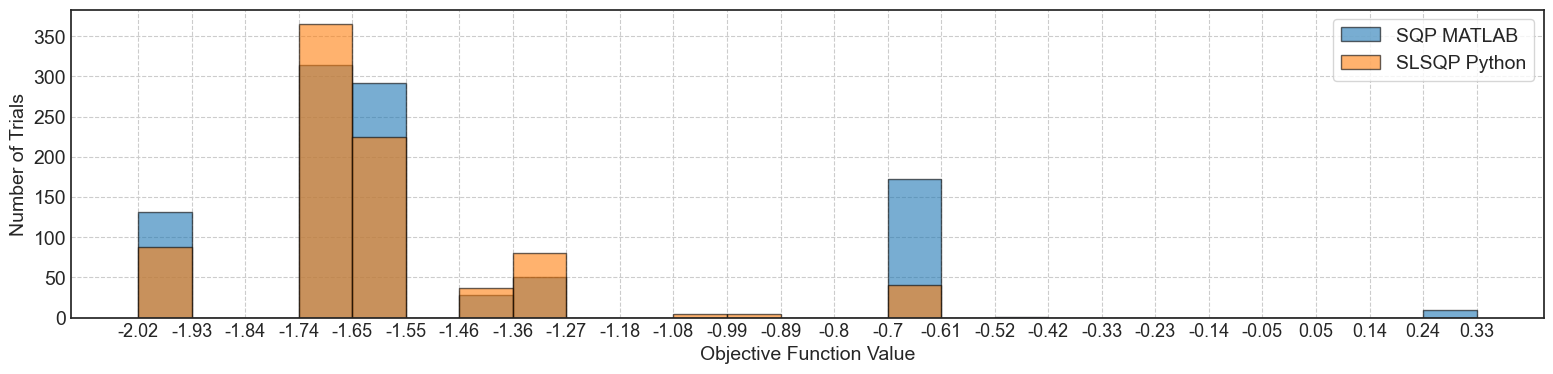

In [199]:
plt.figure(figsize = (19, 4))
bins = np.arange(-2.023, 1, .5)

n, bins, patches = plt.hist(sqp,  label = 'SQP MATLAB', alpha = .6, bins=25, edgecolor = 'k')
plt.hist(slsqp, bins = bins, label = 'SLSQP Python', alpha = .6, edgecolor = 'k');
plt.xticks(bins, np.around(bins, 2), fontsize = 13)
plt.xlabel('Objective Function Value', fontsize = 14)
plt.ylabel('Number of Trials', fontsize = 14)

plt.yticks(fontsize = 14)
plt.legend(fontsize = 14, frameon = True)
plt.grid(linestyle = '--')

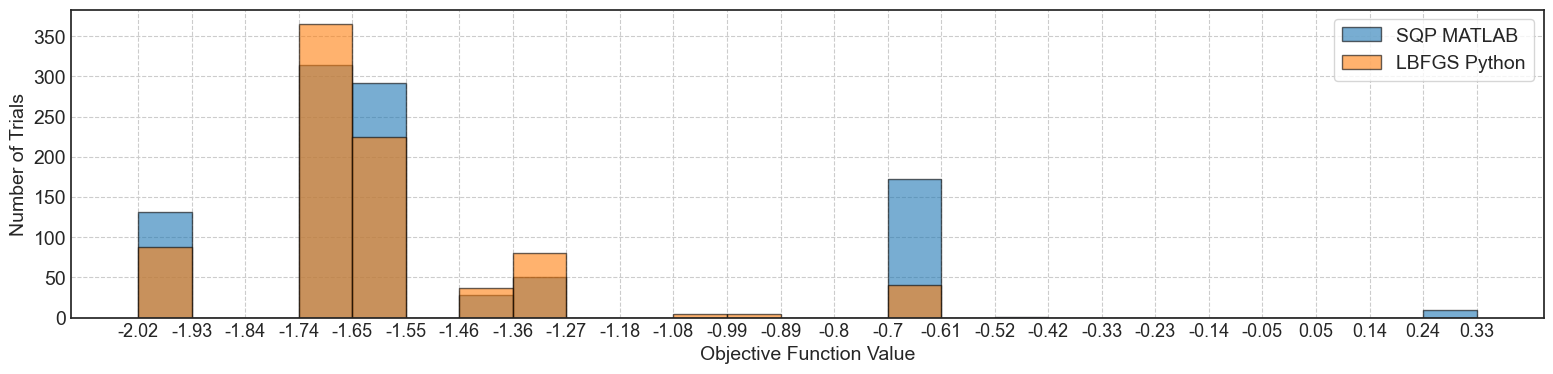

In [200]:
plt.figure(figsize = (19, 4))
bins = np.arange(-2.023, 1, .5)

n, bins, patches = plt.hist(sqp,  label = 'SQP MATLAB', alpha = .6, bins=25, edgecolor = 'k')
plt.hist(y_results, bins = bins, label = 'LBFGS Python', alpha = .6, edgecolor = 'k');
plt.xticks(bins, np.around(bins, 2), fontsize = 13)
plt.xlabel('Objective Function Value', fontsize = 14)
plt.ylabel('Number of Trials', fontsize = 14)

plt.yticks(fontsize = 14)
plt.legend(fontsize = 14, frameon = True)
plt.grid(linestyle = '--')

<AxesSubplot:ylabel='Frequency'>

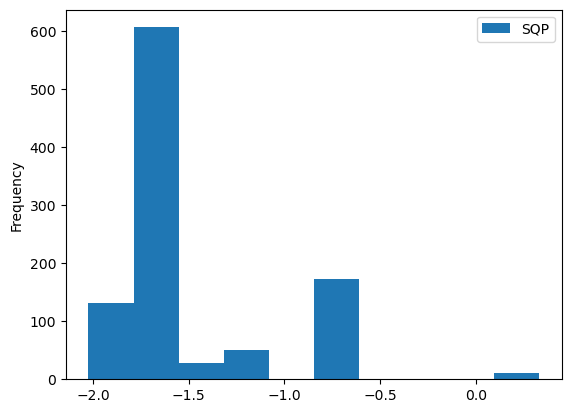

In [71]:
plt.figure(figsize = (19, 4))
bins = np.arange(-2.023, 1, .5)

n, bins, patches = plt.hist(sqp,  label = 'SQP MATLAB', alpha = .6, bins=25, edgecolor = 'k')
plt.hist(y_results, bins = bins, label = 'LBFGS Python', alpha = .6, edgecolor = 'k');
plt.xticks(bins, np.around(bins, 2), fontsize = 13)
plt.xlabel('Objective Function Value', fontsize = 14)
plt.ylabel('Number of Trials', fontsize = 14)

plt.yticks(fontsize = 14)
plt.legend(fontsize = 14, frameon = True)
plt.grid(linestyle = '--')

In [61]:
slsqp[slsqp < -2]

397   -2.023988
952   -2.023988
208   -2.023988
107   -2.023988
829   -2.023988
         ...   
399   -2.023988
561   -2.023988
721   -2.023988
770   -2.023988
730   -2.023988
Name: Yopt, Length: 239, dtype: float64